In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("Libraries imported successfully.")

Libraries imported successfully.


## 1. Data Loading

In [3]:
DATA_PATH = '/kaggle/input/ride-hailing-trip-classification-dataset/'

train = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')
sample_submission = pd.read_csv(DATA_PATH + 'sample_submission.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Sample submission shape: {sample_submission.shape}")

Train shape: (8000000, 25)
Test shape: (4000000, 24)
Sample submission shape: (4000000, 2)


## 2. Initial Data Inspection

In [4]:
train.head(10)

,Trip_ID,Timestamp,Pickup_Lat,Pickup_Long,Dropoff_Lat,Dropoff_Long,GPS_Accuracy_M,Distance_KM,Est_Price_IDR,Surge_Multiplier,Accel_X,Accel_Y,Accel_Z,Gyro_Z,Pickup_Zone,Dropoff_Zone,Device_FP,Promo_Code,Car_Model,Payment_Method,Weather,Traffic,Battery_Level,Signal_Strength,Trip_Label
0,TRIP-00383699,NaN,-6.171481,106.890715,NaN,106.961226,7.602804,21.586724,328518.276846,3.093531,-3.637907,0.304190,NaN,0.235675,JKT-ZONE-06399,JKT-ZONE-03083,Apple-iPhone-7-v3.0,PCP6AQAY,Honda Brio,Cash,Rain,Lancar,14%,3G,Safety_Violation
1,TRIP-11839677,2024-05-17 00:47:56,NaN,106.962939,-6.317811,106.936982,3.567463,2.900550,57636.166476,NaN,0.398592,0.595000,9.918528,0.105604,JKT-ZONE-18157,JKT-ZONE-00734,Oppo-Reno-6-v4.0,NO_VOUCHER,NaN,Credit_Card,Cloudy,Lancar,25%,3G,Perfect_Trip
2,TRIP-00401267,2024-01-05 15:27:46,-6.103016,106.716991,-6.002158,106.614401,12.665372,16.015038,141390.172639,1.726858,-0.125994,0.424621,9.867769,-0.034304,JKT-ZONE-08919,JKT-ZONE-17755,Samsung-iPhone-5-v7.0,NO_VOUCHER,Toyota Avanza,NaN,Clear,NaN,46%,3G,Perfect_Trip
3,TRIP-07296718,2024-03-25 10:51:57,-6.128631,NaN,-6.025428,106.972658,24.973850,11.497623,169474.278890,3.031589,0.656659,-0.211875,9.891046,-0.076039,JKT-ZONE-02891,JKT-ZONE-16716,Vivo-Hot-10-v7.0,NaN,Honda Brio,OVO,Clear,Padat,NaN,Edge,Perfect_Trip
4,TRIP-10098925,2024-04-26 21:15:24,NaN,106.930359,-5.958007,NaN,13.835665,19.666645,102339.029906,1.055553,1.105691,0.245058,9.658218,-0.120996,JKT-ZONE-04617,JKT-ZONE-11542,Apple-Hot-8-v4.0,NO_VOUCHER,Honda Brio,Credit_Card,Storm,Lancar,5%,3G,Perfect_Trip
5,TRIP-08871727,2024-04-12 16:22:06,-6.220555,106.833831,NaN,106.902670,6.106106,8.218858,116125.695978,2.444672,NaN,-0.431786,9.798609,0.107014,NaN,JKT-ZONE-18137,Vivo-Hot-10-v1.0,NO_VOUCHER,Daihatsu Sigra,Credit_Card,Clear,Lancar,28%,Edge,Perfect_Trip
6,TRIP-05199603,2024-03-01 04:20:02,-6.240144,106.981562,NaN,106.917722,6.122820,9.036177,56679.525644,1.244428,0.385306,-0.464807,NaN,0.022945,JKT-ZONE-04229,JKT-ZONE-00449,Oppo-Y_Series-10-v7.0,DDQQ153Y,Suzuki Ertiga,Credit_Card,Storm,Macet,NaN,Edge,Perfect_Trip
7,TRIP-03333474,2024-02-08 13:57:53,-6.317329,106.746287,-6.296334,NaN,11.502595,0.000375,27644.998291,2.303483,0.677051,NaN,9.703179,0.009075,JKT-ZONE-03400,JKT-ZONE-16273,Infinix-iPhone-11-v8.0,NO_VOUCHER,Toyota Avanza,OVO,Cloudy,Lancar,38%,5G,Fraud_Indication
8,TRIP-05819593,NaN,NaN,106.997793,-6.030938,106.973369,9.604240,13.984927,192497.210596,2.847952,0.613173,NaN,10.008992,-0.082219,JKT-ZONE-14411,JKT-ZONE-18421,Oppo-Redmi-13-v7.0,NO_VOUCHER,Toyota Avanza,Credit_Card,Cloudy,Padat,28%,3G,Perfect_Trip
9,TRIP-10265390,2024-04-28 19:29:49,-6.277407,106.707009,NaN,106.688172,11.244986,2.187478,63606.404357,2.986917,-3.173312,0.206799,9.949641,2.959580,NaN,JKT-ZONE-07424,NaN,NaN,Suzuki Ertiga,NaN,Cloudy,Macet,11%,4G,Safety_Violation


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000000 entries, 0 to 7999999
Data columns (total 25 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Trip_ID           object 
 1   Timestamp         object 
 2   Pickup_Lat        float64
 3   Pickup_Long       float64
 4   Dropoff_Lat       float64
 5   Dropoff_Long      float64
 6   GPS_Accuracy_M    float64
 7   Distance_KM       float64
 8   Est_Price_IDR     float64
 9   Surge_Multiplier  float64
 10  Accel_X           float64
 11  Accel_Y           float64
 12  Accel_Z           float64
 13  Gyro_Z            float64
 14  Pickup_Zone       object 
 15  Dropoff_Zone      object 
 16  Device_FP         object 
 17  Promo_Code        object 
 18  Car_Model         object 
 19  Payment_Method    object 
 20  Weather           object 
 21  Traffic           object 
 22  Battery_Level     object 
 23  Signal_Strength   object 
 24  Trip_Label        object 
dtypes: float64(12), object(13)
memory usage: 1.5+

In [6]:
train.describe()

,Pickup_Lat,Pickup_Long,Dropoff_Lat,Dropoff_Long,GPS_Accuracy_M,Distance_KM,Est_Price_IDR,Surge_Multiplier,Accel_X,Accel_Y,Accel_Z,Gyro_Z
count,7.070652e+06,7.388917e+06,6.085560e+06,6.443971e+06,6.495910e+06,7.058683e+06,6.848599e+06,7.387693e+06,6.391558e+06,6.918663e+06,6.159771e+06,7.298286e+06
mean,-6.249949e+00,1.069000e+02,-6.249993e+00,1.069000e+02,1.399986e+01,1.060364e+01,1.224509e+05,2.250170e+00,2.019367e-02,1.001871e-01,9.810069e+00,1.140560e-04
std,8.661788e-02,1.154816e-01,1.179373e-01,1.404903e-01,6.349957e+00,6.183790e+00,7.091073e+04,7.216118e-01,1.629071e+00,4.499804e-01,2.001127e-01,9.069626e-01
min,-6.400000e+00,1.067000e+02,-6.799877e+00,1.063697e+02,3.000001e+00,3.527876e-06,1.200140e+04,1.000000e+00,-5.653780e+00,-2.255346e+00,8.793055e+00,-1.009799e+01
25%,-6.324969e+00,1.068000e+02,-6.334207e+00,1.067954e+02,8.500764e+00,6.125116e+00,6.964973e+04,1.625468e+00,-3.794677e-01,-2.033910e-01,9.675088e+00,-1.296850e-01
50%,-6.249860e+00,1.069001e+02,-6.249949e+00,1.068999e+02,1.399904e+01,1.009145e+01,1.090940e+05,2.250161e+00,2.033421e-02,1.000543e-01,9.810077e+00,-5.148609e-05
75%,-6.174894e+00,1.070000e+02,-6.165783e+00,1.070045e+02,1.949877e+01,1.455114e+01,1.619557e+05,2.875195e+00,4.195791e-01,4.036561e-01,9.944893e+00,1.295851e-01
max,-6.100000e+00,1.071000e+02,-5.708317e+00,1.074498e+02,2.500000e+01,4.782111e+01,7.030040e+05,3.500000e+00,5.693905e+00,2.500499e+00,1.088383e+01,9.635581e+00


### 2.1 Missing Values Analysis


Training Set - Missing Values:
          Column  Missing_Count  Missing_Percentage
     Dropoff_Lat        1914440               23.93
         Accel_Z        1840229               23.00
         Traffic        1808403               22.61
   Battery_Level        1746399               21.83
       Car_Model        1721777               21.52
       Timestamp        1637893               20.47
         Accel_X        1608442               20.11
    Dropoff_Long        1556029               19.45
  GPS_Accuracy_M        1504090               18.80
       Device_FP        1499497               18.74
     Pickup_Zone        1381274               17.27
   Est_Price_IDR        1151401               14.39
  Payment_Method        1141190               14.26
      Promo_Code        1107810               13.85
         Accel_Y        1081337               13.52
     Distance_KM         941317               11.77
      Pickup_Lat         929348               11.62
    Dropoff_Zone         765445 

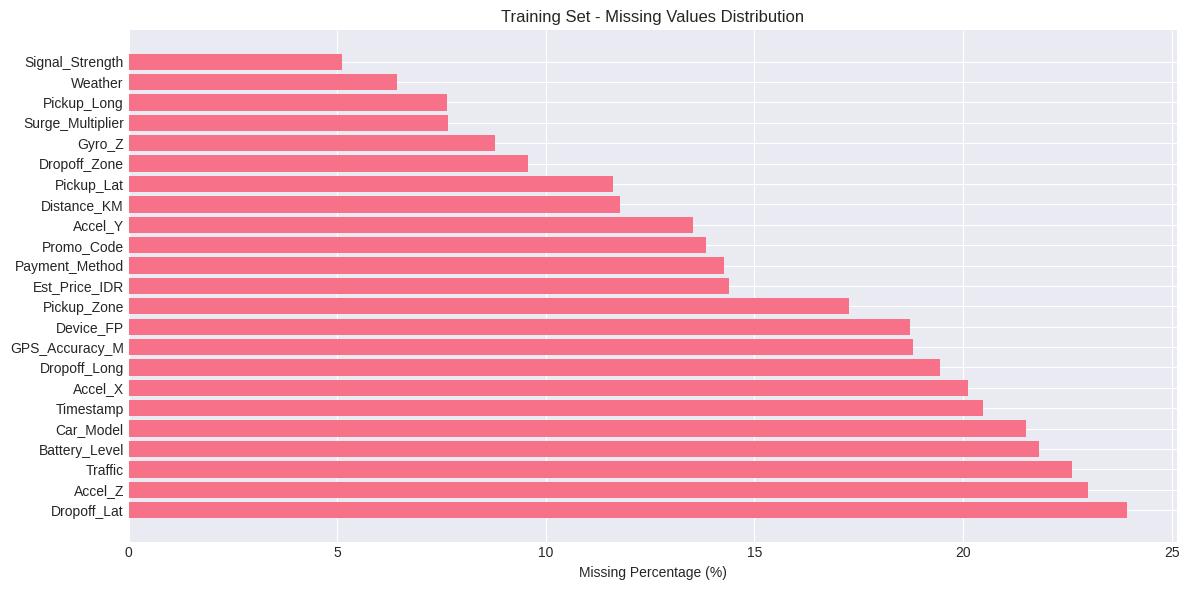


Test Set - Missing Values:
          Column  Missing_Count  Missing_Percentage
     Distance_KM         396051                9.90
   Battery_Level         393943                9.85
     Pickup_Zone         387610                9.69
     Pickup_Long         371655                9.29
       Device_FP         371037                9.28
   Est_Price_IDR         342705                8.57
         Accel_Y         339435                8.49
      Pickup_Lat         339061                8.48
          Gyro_Z         319265                7.98
       Car_Model         300340                7.51
Surge_Multiplier         280388                7.01
  GPS_Accuracy_M         270534                6.76
      Promo_Code         243235                6.08
         Accel_X         238902                5.97
    Dropoff_Long         236633                5.92
    Dropoff_Zone         230517                5.76
     Dropoff_Lat         226977                5.67
 Signal_Strength         215778     

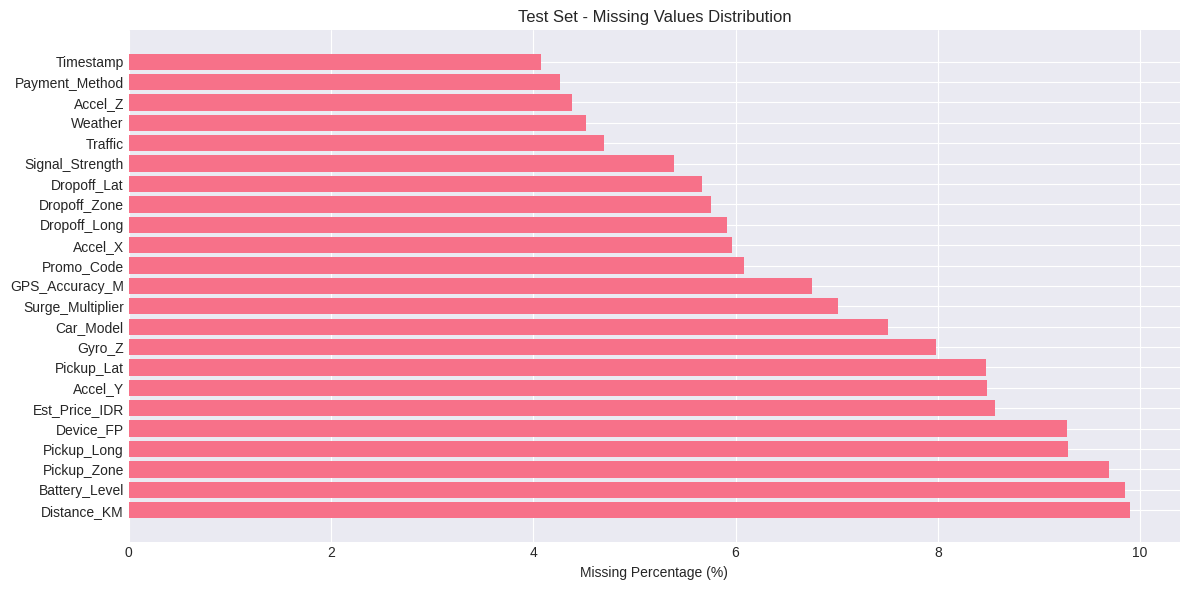

In [7]:
def analyze_missing_values(df, name='Dataset'):
    missing = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
    }).sort_values('Missing_Count', ascending=False)
    
    missing = missing[missing['Missing_Count'] > 0]
    
    if len(missing) > 0:
        print(f"\n{name} - Missing Values:")
        print(missing.to_string(index=False))
        
        plt.figure(figsize=(12, 6))
        plt.barh(missing['Column'], missing['Missing_Percentage'])
        plt.xlabel('Missing Percentage (%)')
        plt.title(f'{name} - Missing Values Distribution')
        plt.tight_layout()
        plt.show()
    else:
        print(f"\n{name} - No missing values detected.")
    
    return missing

missing_train = analyze_missing_values(train, 'Training Set')
missing_test = analyze_missing_values(test, 'Test Set')

## 3. Target Variable Analysis


Target Variable Distribution:
                     Count  Percentage
Trip_Label                            
Perfect_Trip       4397607       54.97
Safety_Violation   1601595       20.02
Navigation_Issue    801790       10.02
Service_Complaint   798695        9.98
Fraud_Indication    400313        5.00


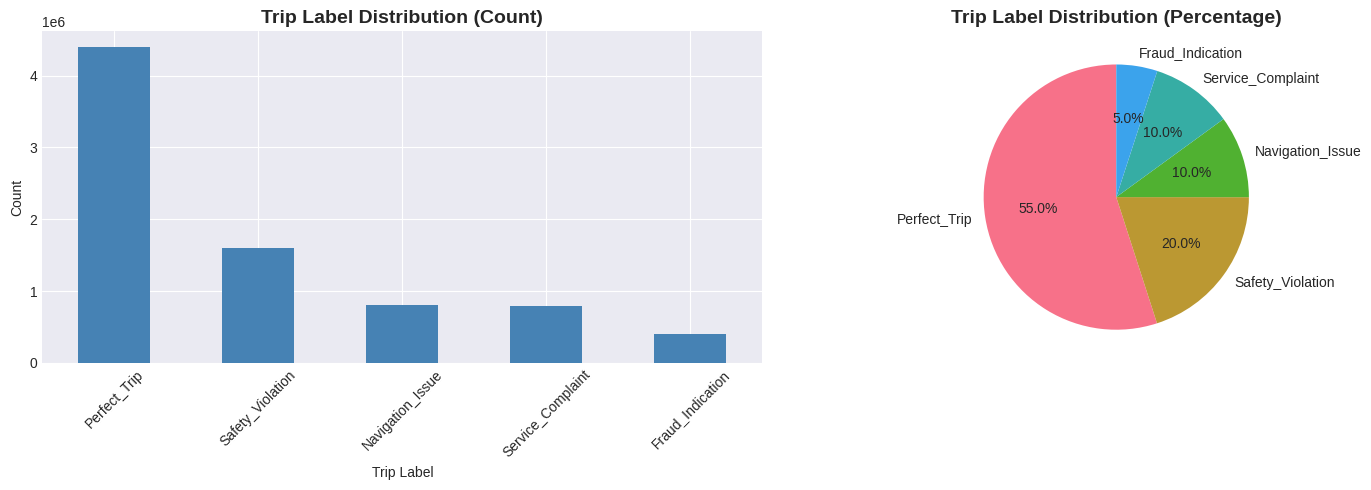


Class Imbalance Ratio: 10.99:1


In [8]:
target_col = 'Trip_Label'

if target_col in train.columns:
    target_counts = train[target_col].value_counts()
    target_pct = train[target_col].value_counts(normalize=True) * 100
    
    target_summary = pd.DataFrame({
        'Count': target_counts,
        'Percentage': target_pct.round(2)
    })
    
    print("\nTarget Variable Distribution:")
    print(target_summary)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    target_counts.plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Trip Label Distribution (Count)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Trip Label')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)
    
    axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Trip Label Distribution (Percentage)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    imbalance_ratio = target_counts.max() / target_counts.min()
    print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")
else:
    print(f"\nTarget column '{target_col}' not found in training data.")

## 4. Spatio-Temporal Features Analysis

In [9]:
spatial_cols = ['Pickup_Lat', 'Pickup_Long', 'Dropoff_Lat', 'Dropoff_Long', 
                'Pickup_Zone', 'Dropoff_Zone', 'Distance_KM']

print("Spatio-Temporal Features Summary:")
for col in spatial_cols:
    if col in train.columns:
        if train[col].dtype in ['float64', 'int64']:
            print(f"\n{col}:")
            print(f"  Min: {train[col].min()}")
            print(f"  Max: {train[col].max()}")
            print(f"  Mean: {train[col].mean():.2f}")
            print(f"  Median: {train[col].median():.2f}")
        else:
            print(f"\n{col}: {train[col].nunique()} unique values")

Spatio-Temporal Features Summary:

Pickup_Lat:
  Min: -6.399999965223751
  Max: -6.10000000586942
  Mean: -6.25
  Median: -6.25

Pickup_Long:
  Min: 106.70000000581388
  Max: 107.09999998339492
  Mean: 106.90
  Median: 106.90

Dropoff_Lat:
  Min: -6.799877199788829
  Max: -5.708317472242891
  Mean: -6.25
  Median: -6.25

Dropoff_Long:
  Min: 106.36969558504144
  Max: 107.44981244707928
  Mean: 106.90
  Median: 106.90

Pickup_Zone: 20000 unique values

Dropoff_Zone: 20000 unique values

Distance_KM:
  Min: 3.5278763418521378e-06
  Max: 47.82111352018876
  Mean: 10.60
  Median: 10.09


### 4.1 Timestamp Analysis

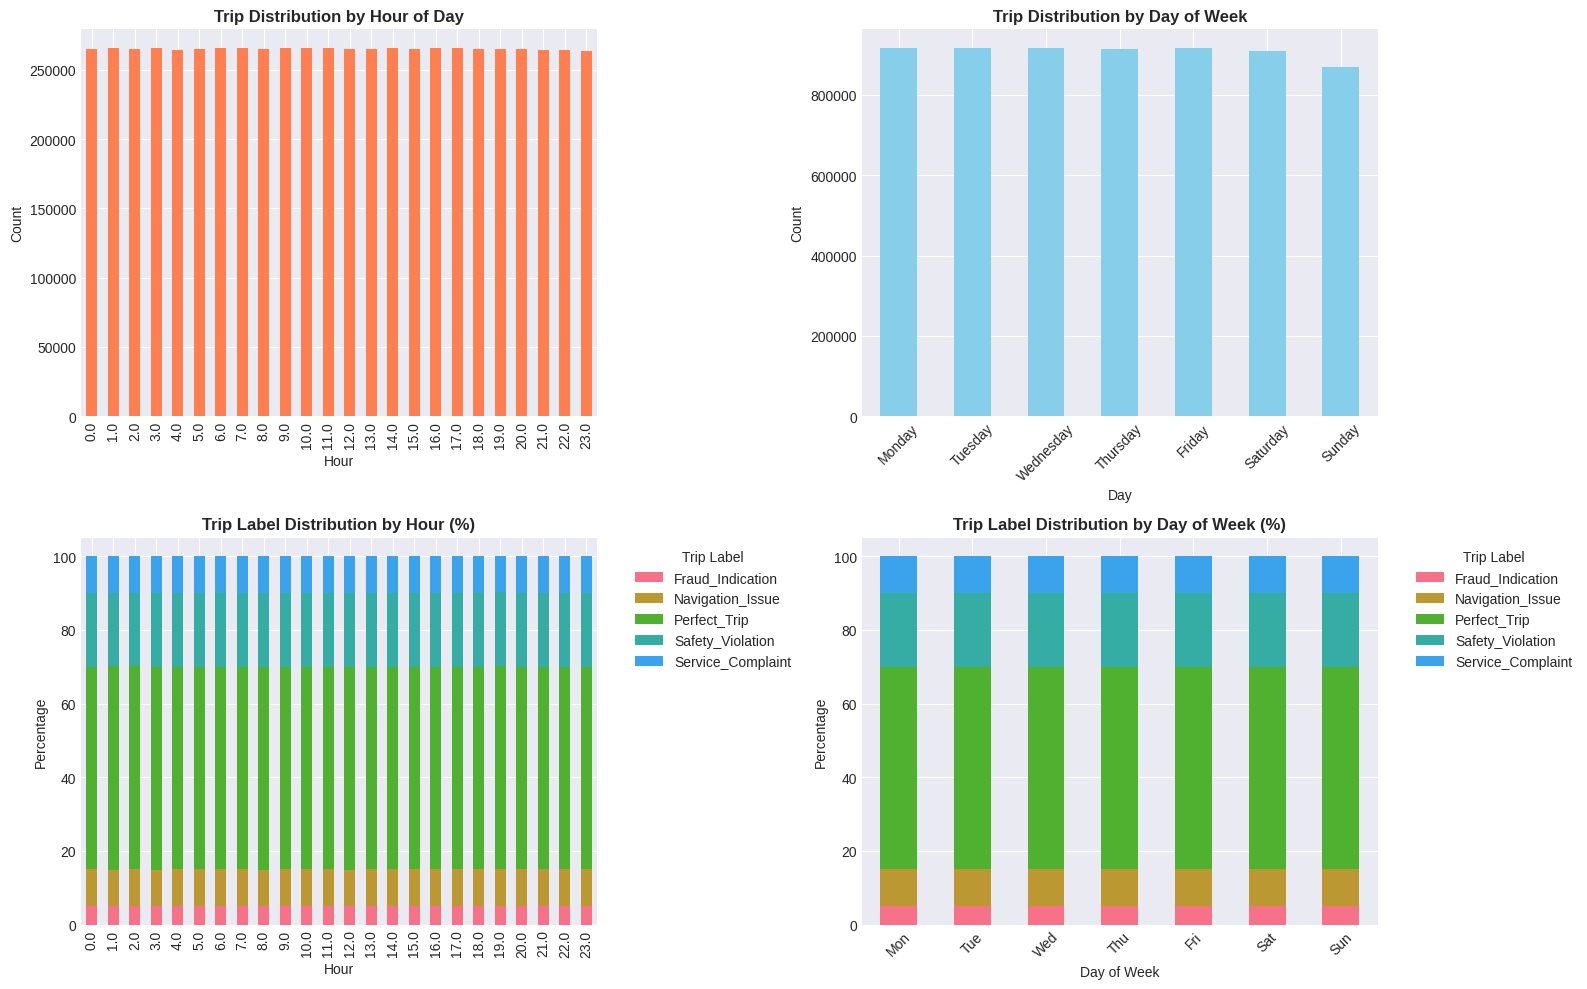

In [10]:
if 'Timestamp' in train.columns:
    train['Timestamp_parsed'] = pd.to_datetime(train['Timestamp'])
    train['Hour'] = train['Timestamp_parsed'].dt.hour
    train['DayOfWeek'] = train['Timestamp_parsed'].dt.dayofweek
    train['DayName'] = train['Timestamp_parsed'].dt.day_name()
    train['Month'] = train['Timestamp_parsed'].dt.month
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    train['Hour'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='coral')
    axes[0, 0].set_title('Trip Distribution by Hour of Day', fontweight='bold')
    axes[0, 0].set_xlabel('Hour')
    axes[0, 0].set_ylabel('Count')
    
    train['DayName'].value_counts()[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                      'Friday', 'Saturday', 'Sunday']].plot(kind='bar', 
                                      ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Trip Distribution by Day of Week', fontweight='bold')
    axes[0, 1].set_xlabel('Day')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    if target_col in train.columns:
        hour_label = pd.crosstab(train['Hour'], train[target_col], normalize='index') * 100
        hour_label.plot(kind='bar', stacked=True, ax=axes[1, 0])
        axes[1, 0].set_title('Trip Label Distribution by Hour (%)', fontweight='bold')
        axes[1, 0].set_xlabel('Hour')
        axes[1, 0].set_ylabel('Percentage')
        axes[1, 0].legend(title='Trip Label', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        day_label = pd.crosstab(train['DayOfWeek'], train[target_col], normalize='index') * 100
        day_label.plot(kind='bar', stacked=True, ax=axes[1, 1])
        axes[1, 1].set_title('Trip Label Distribution by Day of Week (%)', fontweight='bold')
        axes[1, 1].set_xlabel('Day of Week')
        axes[1, 1].set_ylabel('Percentage')
        axes[1, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
        axes[1, 1].legend(title='Trip Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

### 4.2 Distance and Location Analysis

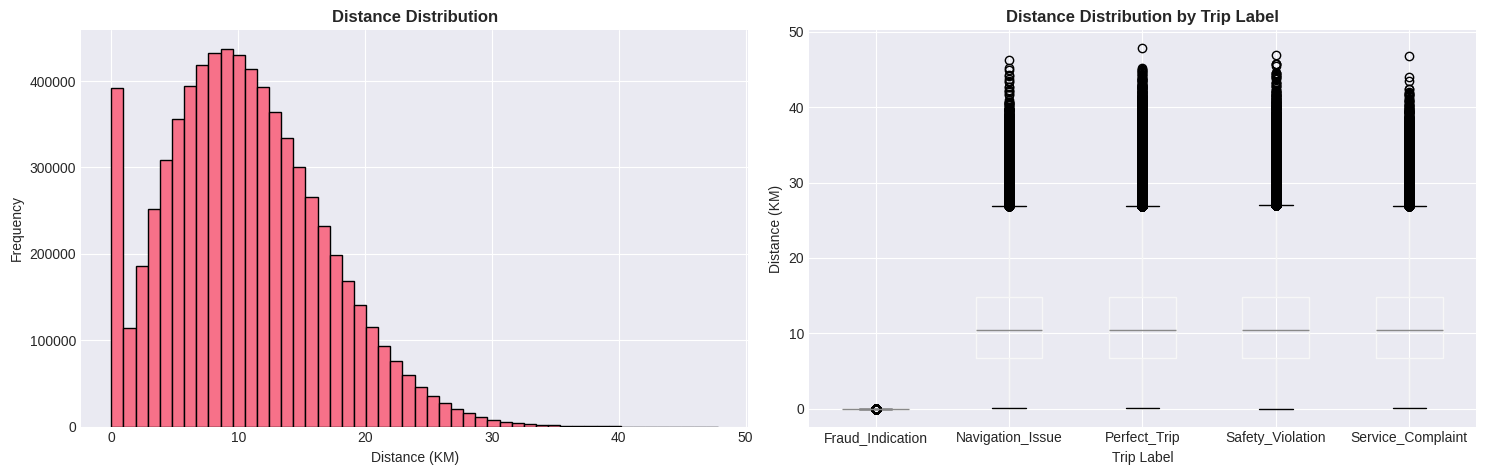


Distance Statistics:
Mean: 10.60 KM
Median: 10.09 KM
Min: 0.00 KM
Max: 47.82 KM


In [11]:
if 'Distance_KM' in train.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    train['Distance_KM'].hist(bins=50, ax=axes[0], edgecolor='black')
    axes[0].set_title('Distance Distribution', fontweight='bold')
    axes[0].set_xlabel('Distance (KM)')
    axes[0].set_ylabel('Frequency')
    
    if target_col in train.columns:
        train.boxplot(column='Distance_KM', by=target_col, ax=axes[1])
        axes[1].set_title('Distance Distribution by Trip Label', fontweight='bold')
        axes[1].set_xlabel('Trip Label')
        axes[1].set_ylabel('Distance (KM)')
        plt.suptitle('')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nDistance Statistics:")
    print(f"Mean: {train['Distance_KM'].mean():.2f} KM")
    print(f"Median: {train['Distance_KM'].median():.2f} KM")
    print(f"Min: {train['Distance_KM'].min():.2f} KM")
    print(f"Max: {train['Distance_KM'].max():.2f} KM")

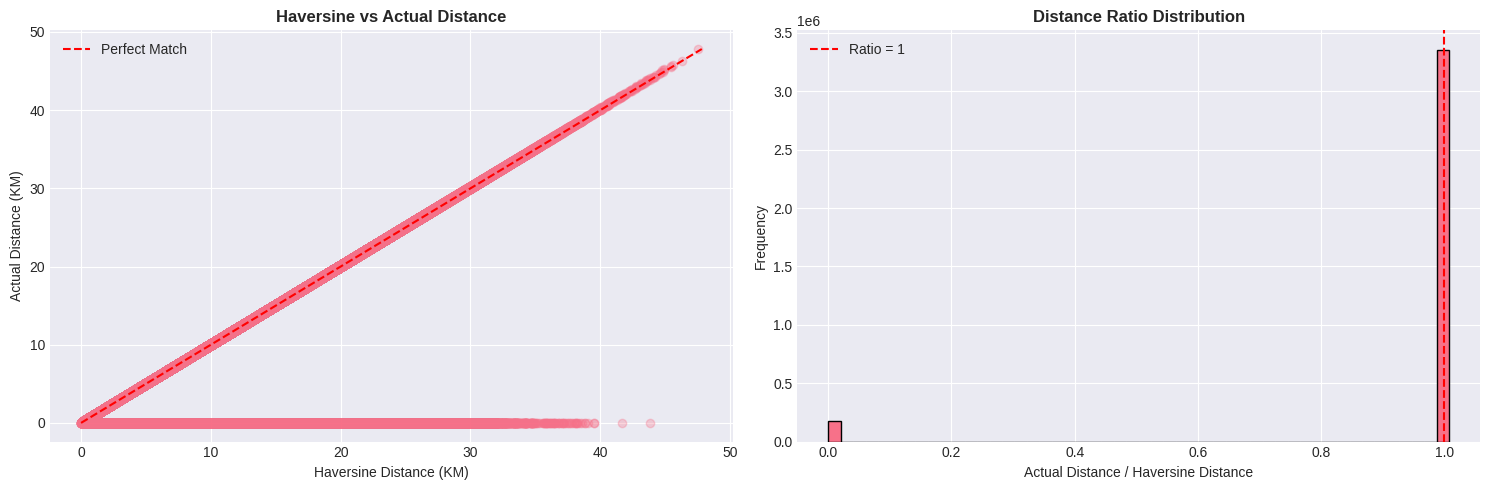


Distance Ratio Statistics:
Mean: 0.95
Median: 1.00


In [12]:
if all(col in train.columns for col in ['Pickup_Lat', 'Pickup_Long', 'Dropoff_Lat', 'Dropoff_Long']):
    def haversine_distance(lat1, lon1, lat2, lon2):
        R = 6371
        lat1_rad = np.radians(lat1)
        lat2_rad = np.radians(lat2)
        delta_lat = np.radians(lat2 - lat1)
        delta_lon = np.radians(lon2 - lon1)
        
        a = np.sin(delta_lat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon/2)**2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
        
        return R * c
    
    train['Haversine_Distance'] = haversine_distance(
        train['Pickup_Lat'], train['Pickup_Long'],
        train['Dropoff_Lat'], train['Dropoff_Long']
    )
    
    if 'Distance_KM' in train.columns:
        train['Distance_Ratio'] = train['Distance_KM'] / (train['Haversine_Distance'] + 1e-6)
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        axes[0].scatter(train['Haversine_Distance'], train['Distance_KM'], alpha=0.3)
        axes[0].plot([0, train['Distance_KM'].max()], [0, train['Distance_KM'].max()], 
                     'r--', label='Perfect Match')
        axes[0].set_xlabel('Haversine Distance (KM)')
        axes[0].set_ylabel('Actual Distance (KM)')
        axes[0].set_title('Haversine vs Actual Distance', fontweight='bold')
        axes[0].legend()
        
        train['Distance_Ratio'].hist(bins=50, ax=axes[1], edgecolor='black')
        axes[1].set_title('Distance Ratio Distribution', fontweight='bold')
        axes[1].set_xlabel('Actual Distance / Haversine Distance')
        axes[1].set_ylabel('Frequency')
        axes[1].axvline(x=1, color='r', linestyle='--', label='Ratio = 1')
        axes[1].legend()
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nDistance Ratio Statistics:")
        print(f"Mean: {train['Distance_Ratio'].mean():.2f}")
        print(f"Median: {train['Distance_Ratio'].median():.2f}")

### 4.3 Zone Analysis


Number of unique Pickup Zones: 20000
Number of unique Dropoff Zones: 20000


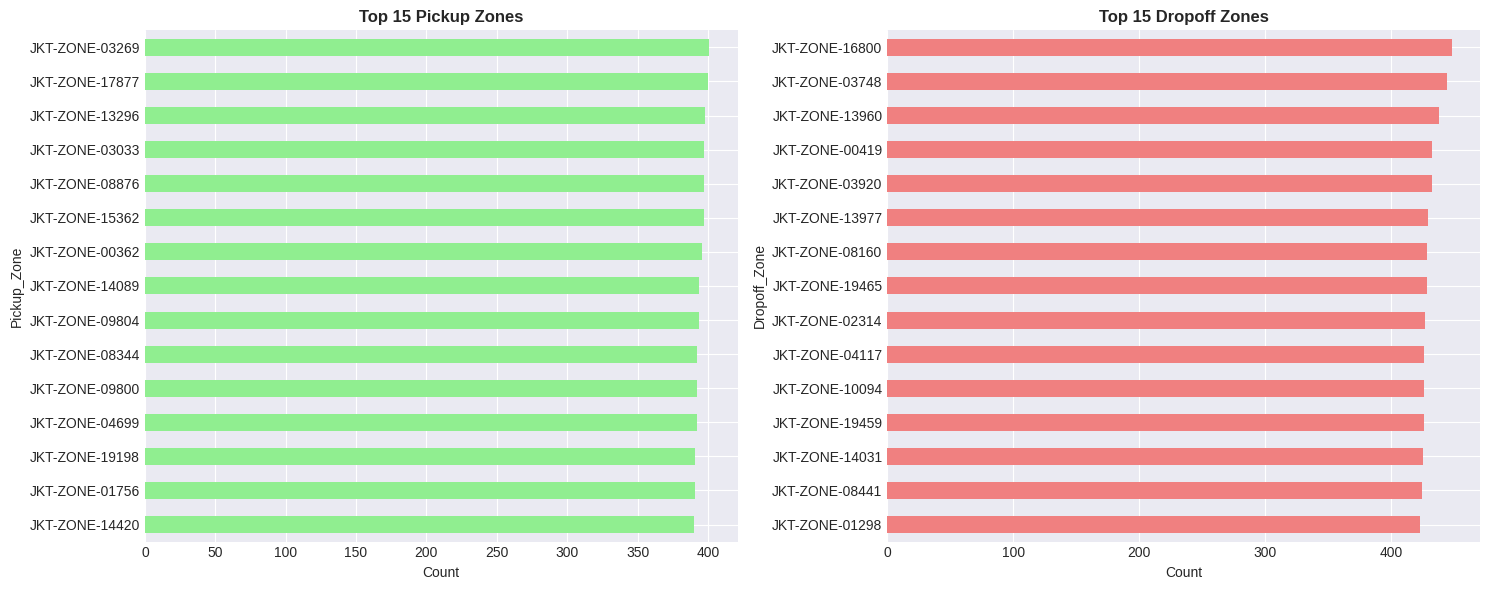

In [13]:
if 'Pickup_Zone' in train.columns and 'Dropoff_Zone' in train.columns:
    print(f"\nNumber of unique Pickup Zones: {train['Pickup_Zone'].nunique()}")
    print(f"Number of unique Dropoff Zones: {train['Dropoff_Zone'].nunique()}")
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    top_pickup = train['Pickup_Zone'].value_counts().head(15)
    top_pickup.plot(kind='barh', ax=axes[0], color='lightgreen')
    axes[0].set_title('Top 15 Pickup Zones', fontweight='bold')
    axes[0].set_xlabel('Count')
    axes[0].invert_yaxis()
    
    top_dropoff = train['Dropoff_Zone'].value_counts().head(15)
    top_dropoff.plot(kind='barh', ax=axes[1], color='lightcoral')
    axes[1].set_title('Top 15 Dropoff Zones', fontweight='bold')
    axes[1].set_xlabel('Count')
    axes[1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()

## 5. Telematics (Sensor) Data Analysis

Sensor Data Summary:
            Accel_X       Accel_Y       Accel_Z        Gyro_Z  GPS_Accuracy_M  \
count  6.391558e+06  6.918663e+06  6.159771e+06  7.298286e+06    6.495910e+06   
mean   2.019367e-02  1.001871e-01  9.810069e+00  1.140560e-04    1.399986e+01   
std    1.629071e+00  4.499804e-01  2.001127e-01  9.069626e-01    6.349957e+00   
min   -5.653780e+00 -2.255346e+00  8.793055e+00 -1.009799e+01    3.000001e+00   
25%   -3.794677e-01 -2.033910e-01  9.675088e+00 -1.296850e-01    8.500764e+00   
50%    2.033421e-02  1.000543e-01  9.810077e+00 -5.148609e-05    1.399904e+01   
75%    4.195791e-01  4.036561e-01  9.944893e+00  1.295851e-01    1.949877e+01   
max    5.693905e+00  2.500499e+00  1.088383e+01  9.635581e+00    2.500000e+01   

       Accel_Magnitude  
count     4.255249e+06  
mean      9.952019e+00  
std       3.199591e-01  
min       8.865305e+00  
25%       9.732811e+00  
50%       9.893557e+00  
75%       1.010789e+01  
max       1.177605e+01  


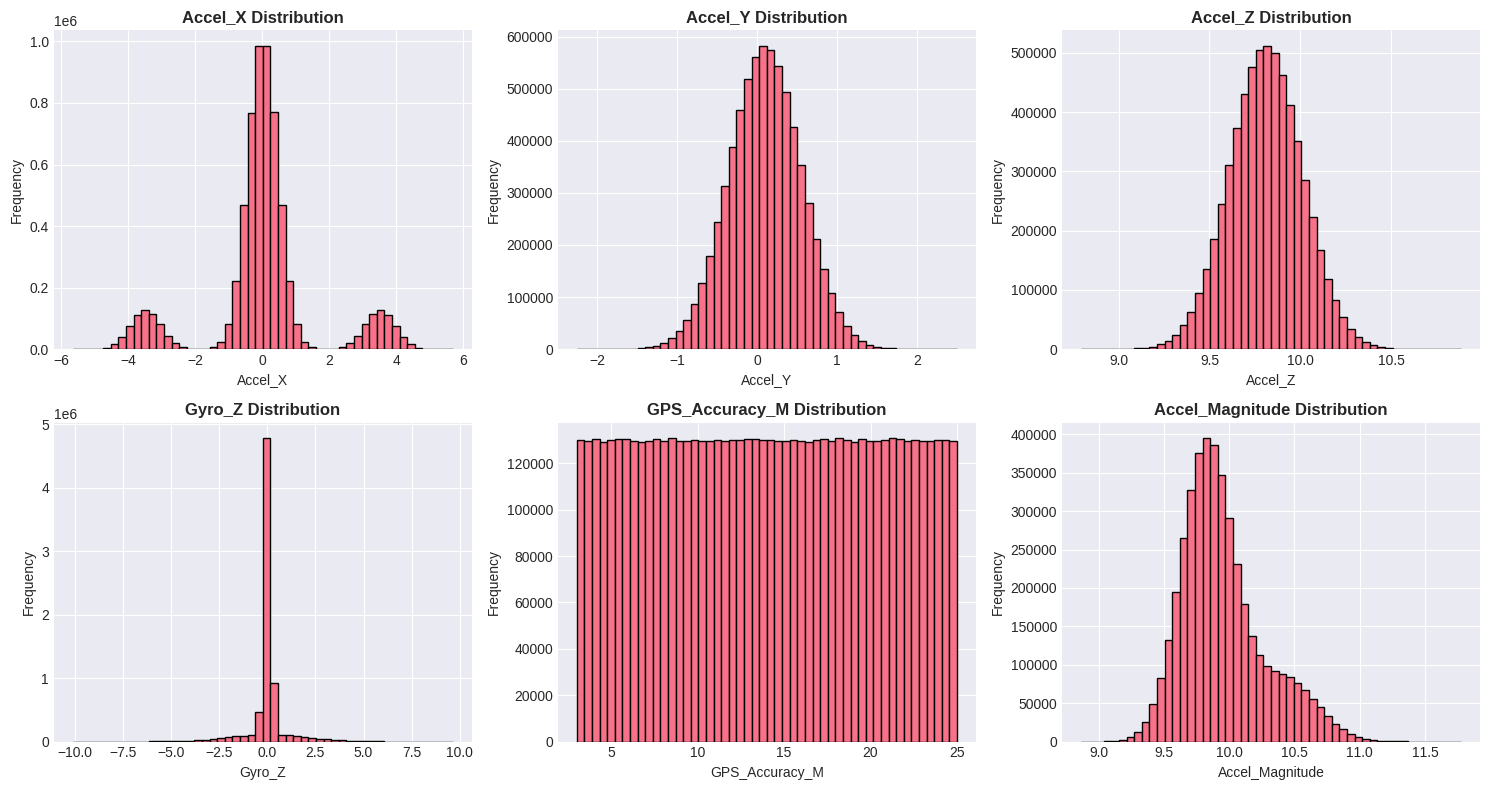

In [14]:
sensor_cols = ['Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_Z', 'GPS_Accuracy_M']

if all(col in train.columns for col in ['Accel_X', 'Accel_Y', 'Accel_Z']):
    train['Accel_Magnitude'] = np.sqrt(train['Accel_X']**2 + train['Accel_Y']**2 + train['Accel_Z']**2)
    sensor_cols.append('Accel_Magnitude')

available_sensors = [col for col in sensor_cols if col in train.columns]

if available_sensors:
    print("Sensor Data Summary:")
    print(train[available_sensors].describe())
    
    n_cols = 3
    n_rows = (len(available_sensors) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(available_sensors):
        train[col].hist(bins=50, ax=axes[idx], edgecolor='black')
        axes[idx].set_title(f'{col} Distribution', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
    
    for idx in range(len(available_sensors), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

### 5.1 Sensor Data by Trip Label

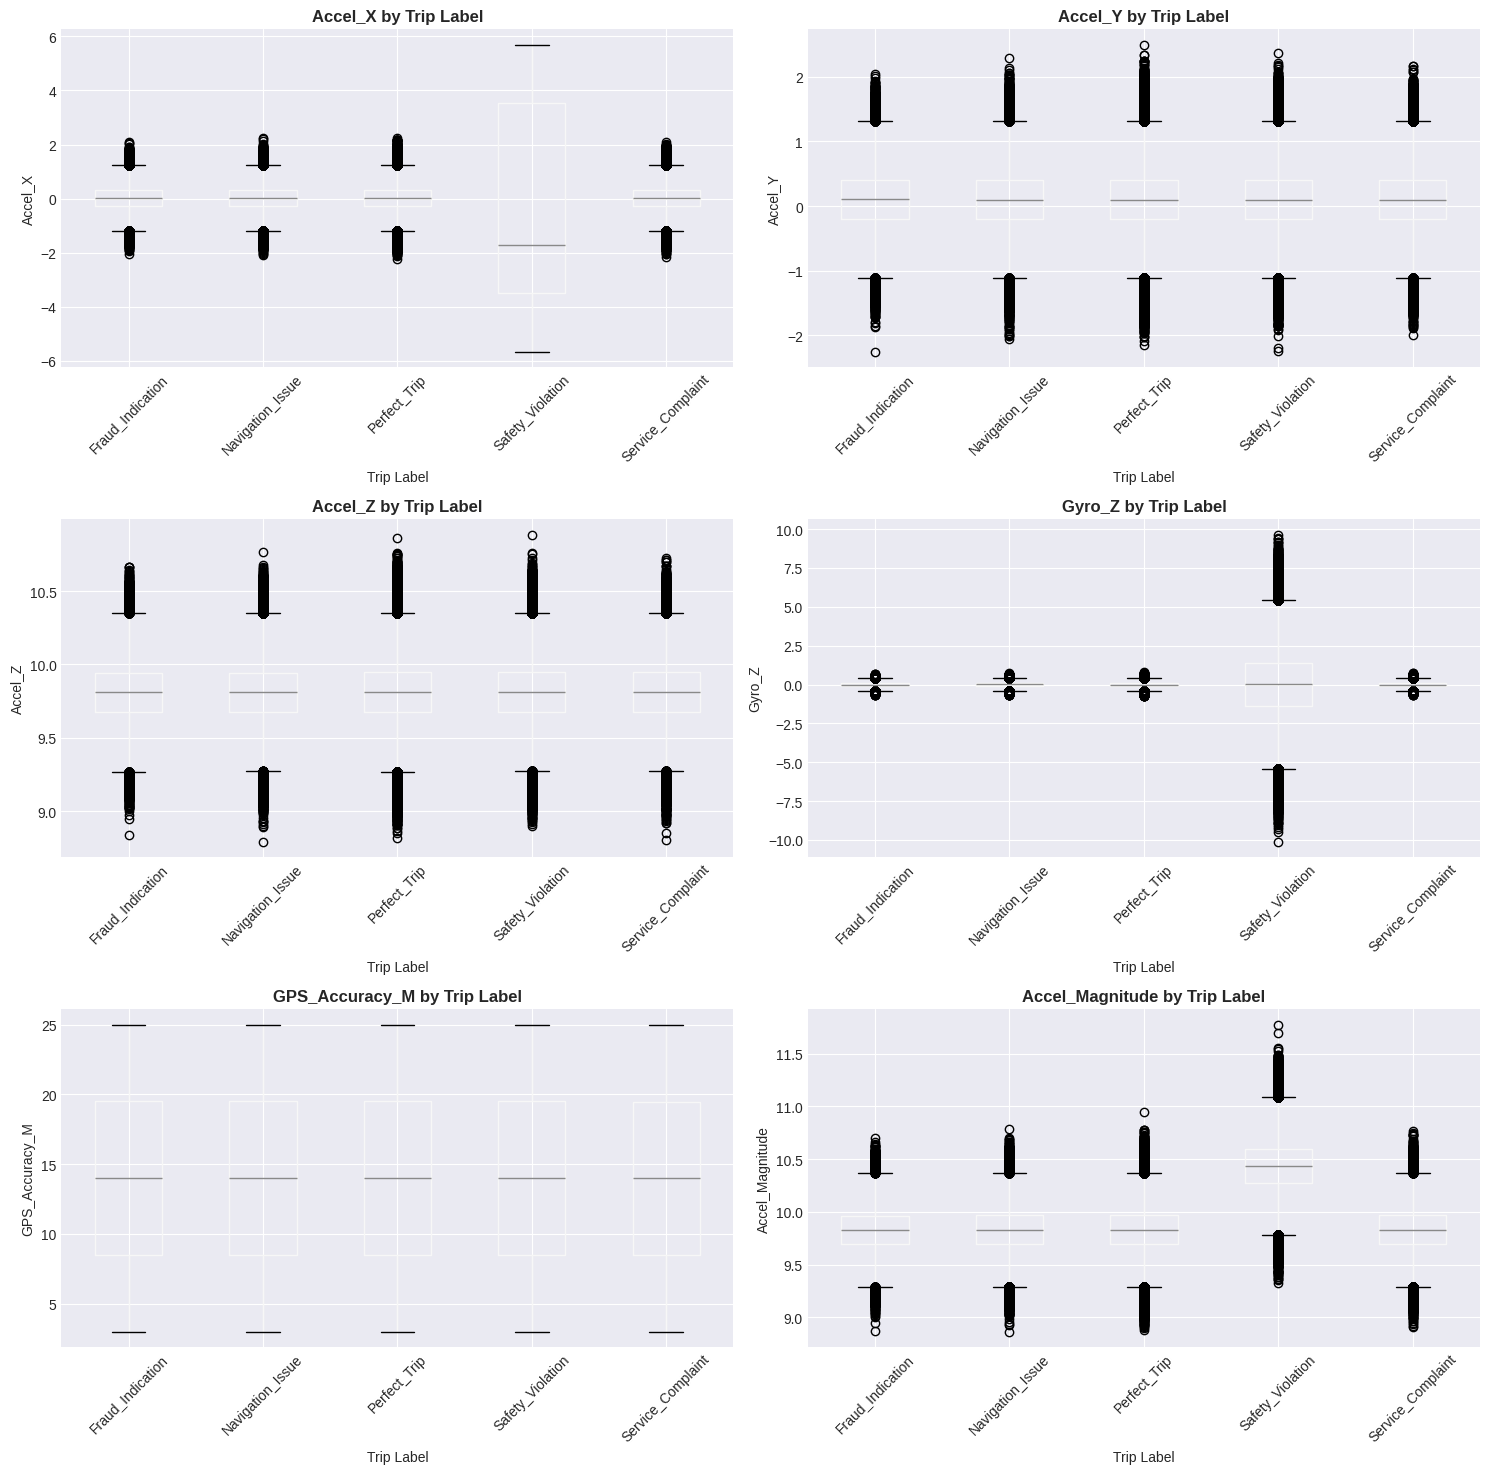

In [15]:
if target_col in train.columns and available_sensors:
    n_cols = 2
    n_rows = (len(available_sensors) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(available_sensors):
        train.boxplot(column=col, by=target_col, ax=axes[idx])
        axes[idx].set_title(f'{col} by Trip Label', fontweight='bold')
        axes[idx].set_xlabel('Trip Label')
        axes[idx].set_ylabel(col)
        axes[idx].tick_params(axis='x', rotation=45)
        plt.suptitle('')
    
    for idx in range(len(available_sensors), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

## 6. Transaction and Economics Analysis

In [16]:
transaction_cols = ['Est_Price_IDR', 'Surge_Multiplier', 'Promo_Code', 'Payment_Method']

available_transaction = [col for col in transaction_cols if col in train.columns]

if available_transaction:
    print("Transaction Features Summary:")
    for col in available_transaction:
        if train[col].dtype in ['float64', 'int64']:
            print(f"\n{col}:")
            print(f"  Mean: {train[col].mean():.2f}")
            print(f"  Median: {train[col].median():.2f}")
            print(f"  Min: {train[col].min():.2f}")
            print(f"  Max: {train[col].max():.2f}")
        else:
            print(f"\n{col}: {train[col].nunique()} unique values")
            print(train[col].value_counts().head())

Transaction Features Summary:

Est_Price_IDR:
  Mean: 122450.87
  Median: 109093.99
  Min: 12001.40
  Max: 703004.03

Surge_Multiplier:
  Mean: 2.25
  Median: 2.25
  Min: 1.00
  Max: 3.50

Promo_Code: 491994 unique values
Promo_Code
NO_VOUCHER    4823367
KRSLBXXH           17
J8EB8DUL           16
H4QTSEGA           16
1GIOFO6B           16
Name: count, dtype: int64

Payment_Method: 4 unique values
Payment_Method
OVO            1716486
Credit_Card    1714765
Gopay          1714391
Cash           1713168
Name: count, dtype: int64


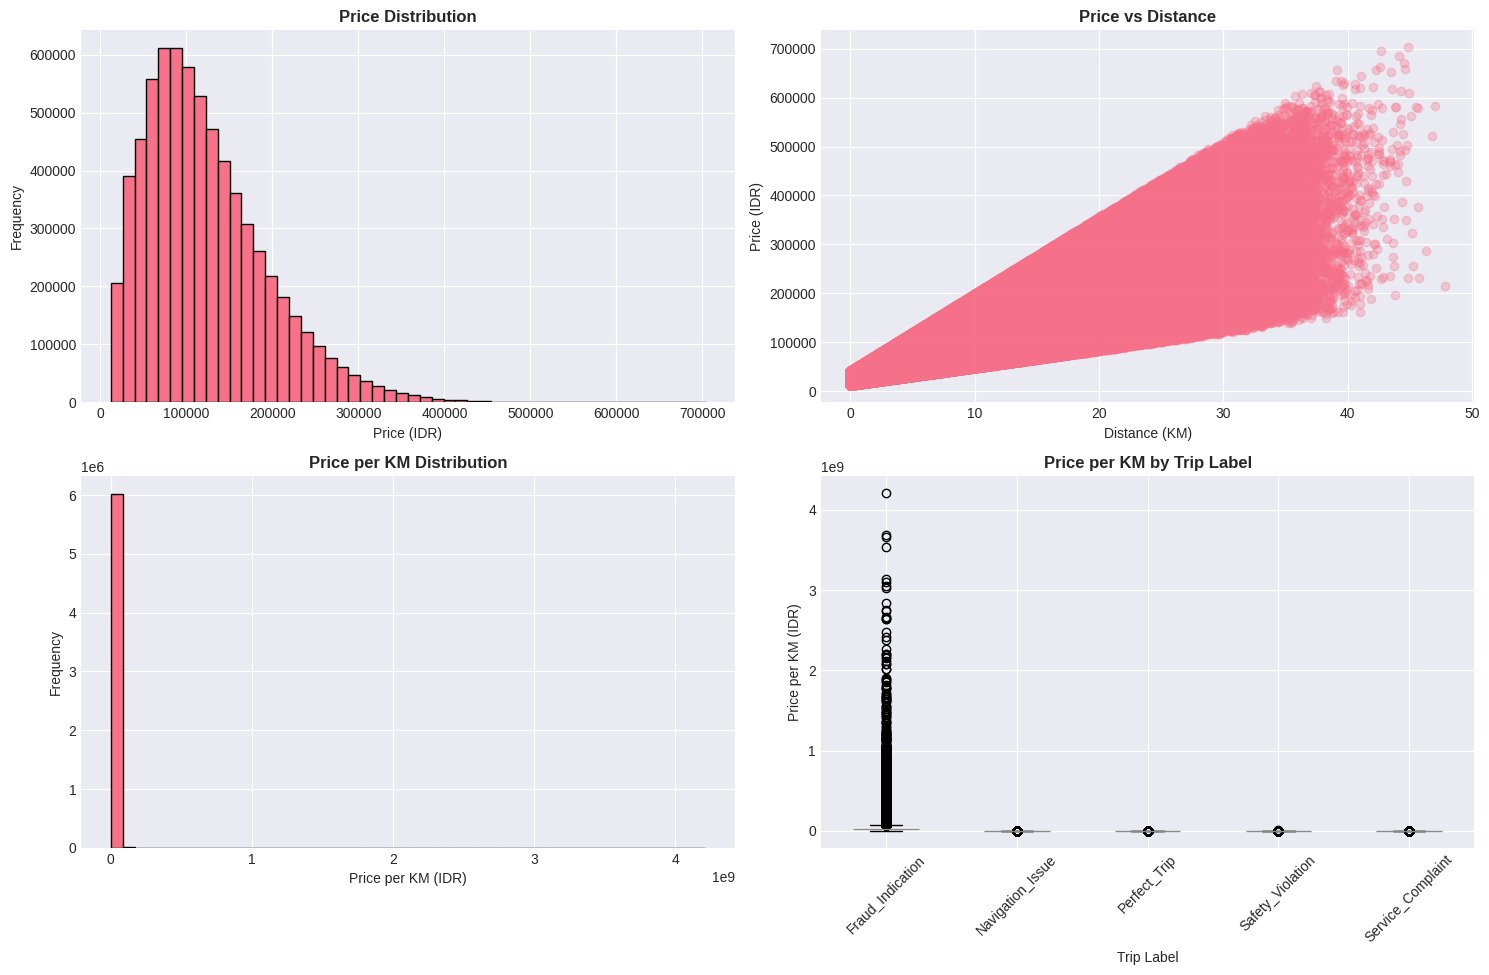

In [17]:
if 'Est_Price_IDR' in train.columns and 'Distance_KM' in train.columns:
    train['Price_per_KM'] = train['Est_Price_IDR'] / (train['Distance_KM'] + 1e-6)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    train['Est_Price_IDR'].hist(bins=50, ax=axes[0, 0], edgecolor='black')
    axes[0, 0].set_title('Price Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('Price (IDR)')
    axes[0, 0].set_ylabel('Frequency')
    
    axes[0, 1].scatter(train['Distance_KM'], train['Est_Price_IDR'], alpha=0.3)
    axes[0, 1].set_title('Price vs Distance', fontweight='bold')
    axes[0, 1].set_xlabel('Distance (KM)')
    axes[0, 1].set_ylabel('Price (IDR)')
    
    train['Price_per_KM'].hist(bins=50, ax=axes[1, 0], edgecolor='black')
    axes[1, 0].set_title('Price per KM Distribution', fontweight='bold')
    axes[1, 0].set_xlabel('Price per KM (IDR)')
    axes[1, 0].set_ylabel('Frequency')
    
    if target_col in train.columns:
        train.boxplot(column='Price_per_KM', by=target_col, ax=axes[1, 1])
        axes[1, 1].set_title('Price per KM by Trip Label', fontweight='bold')
        axes[1, 1].set_xlabel('Trip Label')
        axes[1, 1].set_ylabel('Price per KM (IDR)')
        axes[1, 1].tick_params(axis='x', rotation=45)
        plt.suptitle('')
    
    plt.tight_layout()
    plt.show()

In [ ]:
if 'Surge_Multiplier' in train.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    train['Surge_Multiplier'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='orange')
    axes[0].set_title('Surge Multiplier Distribution', fontweight='bold')
    axes[0].set_xlabel('Surge Multiplier')
    axes[0].set_ylabel('Count')
    
    if target_col in train.columns:
        surge_label = pd.crosstab(train['Surge_Multiplier'], train[target_col], normalize='index') * 100
        surge_label.plot(kind='bar', stacked=True, ax=axes[1])
        axes[1].set_title('Trip Label Distribution by Surge Multiplier (%)', fontweight='bold')
        axes[1].set_xlabel('Surge Multiplier')
        axes[1].set_ylabel('Percentage')
        axes[1].legend(title='Trip Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

In [ ]:
categorical_transaction = ['Promo_Code', 'Payment_Method']

for col in categorical_transaction:
    if col in train.columns:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        train[col].value_counts().plot(kind='bar', ax=axes[0], color='teal')
        axes[0].set_title(f'{col} Distribution', fontweight='bold')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Count')
        axes[0].tick_params(axis='x', rotation=45)
        
        if target_col in train.columns:
            cat_label = pd.crosstab(train[col], train[target_col], normalize='index') * 100
            cat_label.plot(kind='bar', stacked=True, ax=axes[1])
            axes[1].set_title(f'Trip Label Distribution by {col} (%)', fontweight='bold')
            axes[1].set_xlabel(col)
            axes[1].set_ylabel('Percentage')
            axes[1].tick_params(axis='x', rotation=45)
            axes[1].legend(title='Trip Label', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()

## 7. Device and Environment Features

In [20]:
device_env_cols = ['Device_FP', 'Car_Model', 'Weather', 'Traffic', 'Battery_Level', 'Signal_Strength']

available_device_env = [col for col in device_env_cols if col in train.columns]

if available_device_env:
    print("Device and Environment Features Summary:")
    for col in available_device_env:
        if train[col].dtype in ['float64', 'int64']:
            print(f"\n{col}:")
            print(f"  Mean: {train[col].mean():.2f}")
            print(f"  Median: {train[col].median():.2f}")
            print(f"  Min: {train[col].min():.2f}")
            print(f"  Max: {train[col].max():.2f}")
        else:
            print(f"\n{col}: {train[col].nunique()} unique values")
            if train[col].nunique() < 20:
                print(train[col].value_counts())

Device and Environment Features Summary:

Device_FP: 288 unique values

Car_Model: 4 unique values
Car_Model
Toyota Avanza     1571028
Honda Brio        1569513
Suzuki Ertiga     1569220
Daihatsu Sigra    1568462
Name: count, dtype: int64

Weather: 4 unique values
Weather
Rain      1872007
Cloudy    1871873
Clear     1870893
Storm     1870578
Name: count, dtype: int64

Traffic: 3 unique values
Traffic
Macet     2064533
Lancar    2064179
Padat     2062885
Name: count, dtype: int64

Battery_Level: 95 unique values

Signal_Strength: 4 unique values
Signal_Strength
Edge    1899148
4G      1898105
3G      1897898
5G      1896261
Name: count, dtype: int64


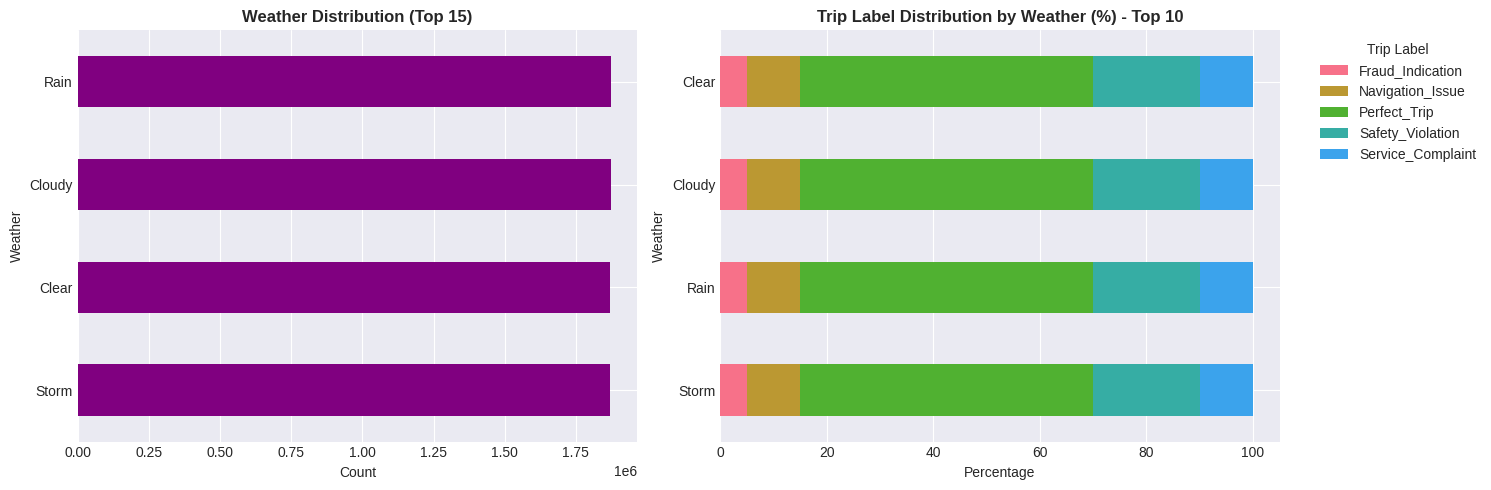

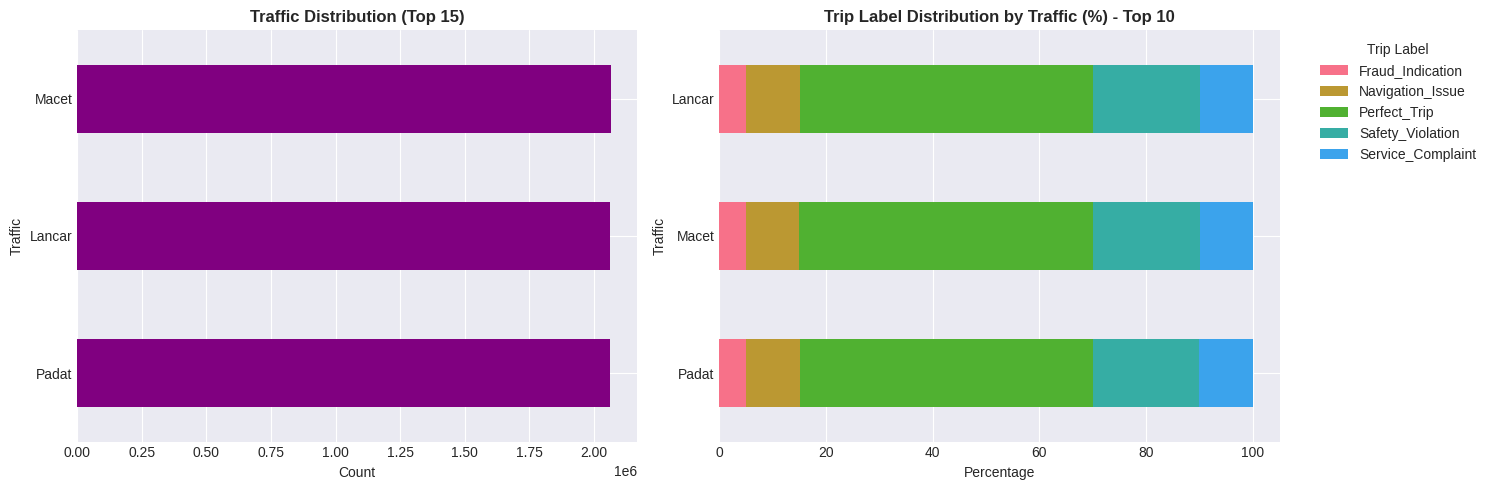

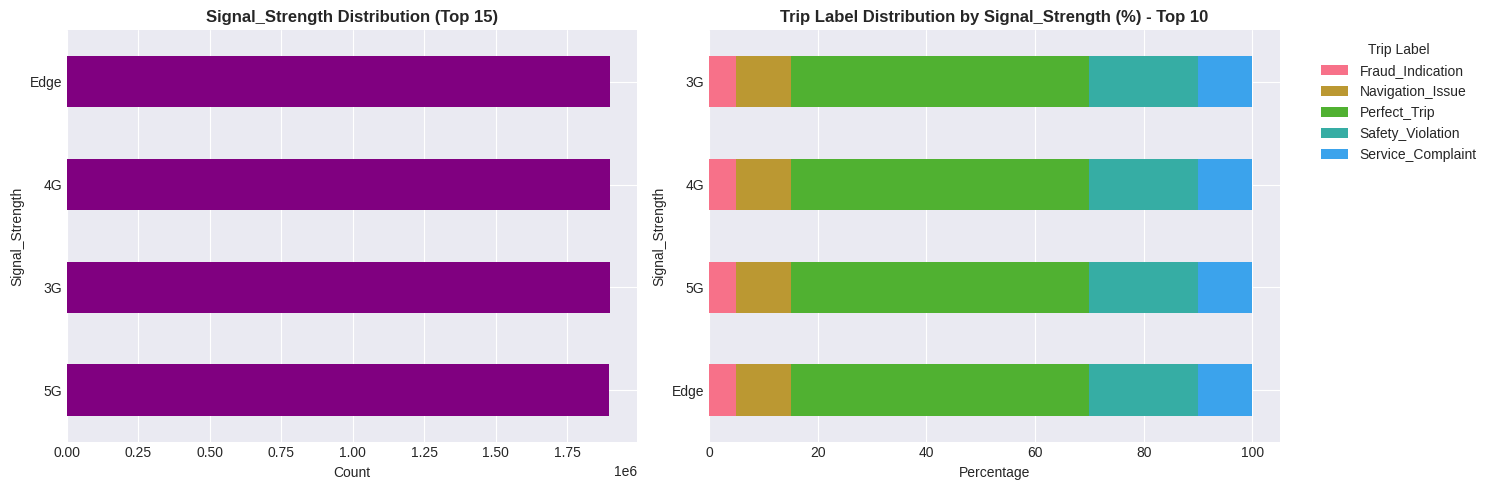

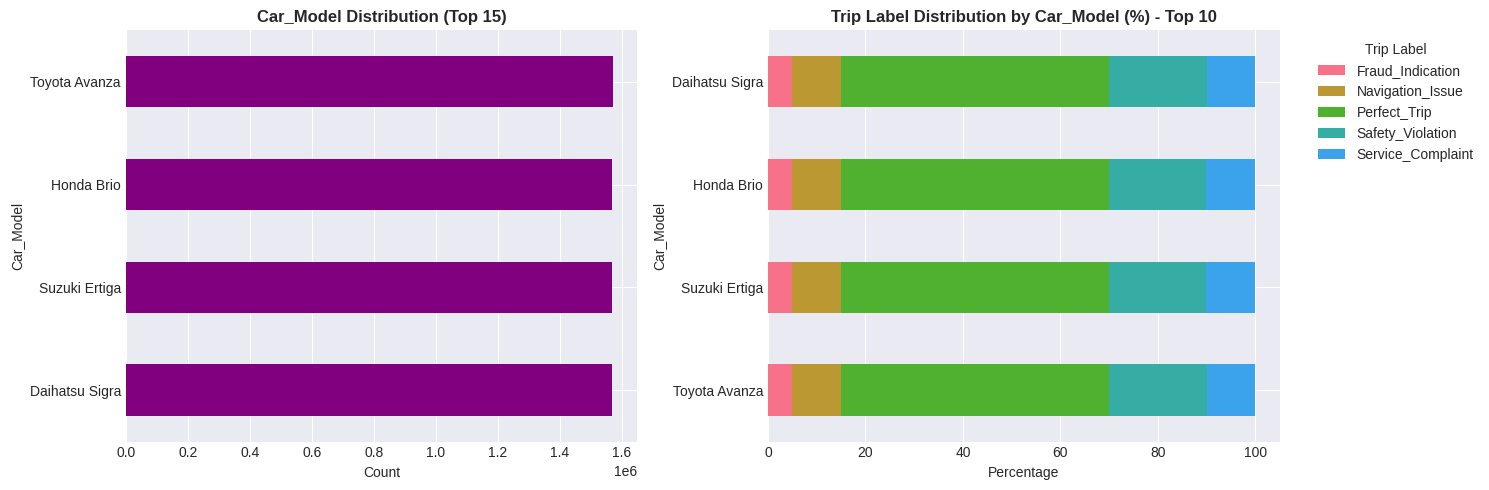

In [21]:
categorical_device = ['Weather', 'Traffic', 'Signal_Strength', 'Car_Model']

for col in categorical_device:
    if col in train.columns and train[col].nunique() < 50:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        top_values = train[col].value_counts().head(15)
        top_values.plot(kind='barh', ax=axes[0], color='purple')
        axes[0].set_title(f'{col} Distribution (Top 15)', fontweight='bold')
        axes[0].set_xlabel('Count')
        axes[0].invert_yaxis()
        
        if target_col in train.columns:
            top_cats = train[col].value_counts().head(10).index
            filtered_data = train[train[col].isin(top_cats)]
            cat_label = pd.crosstab(filtered_data[col], filtered_data[target_col], normalize='index') * 100
            cat_label.plot(kind='barh', stacked=True, ax=axes[1])
            axes[1].set_title(f'Trip Label Distribution by {col} (%) - Top 10', fontweight='bold')
            axes[1].set_xlabel('Percentage')
            axes[1].invert_yaxis()
            axes[1].legend(title='Trip Label', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

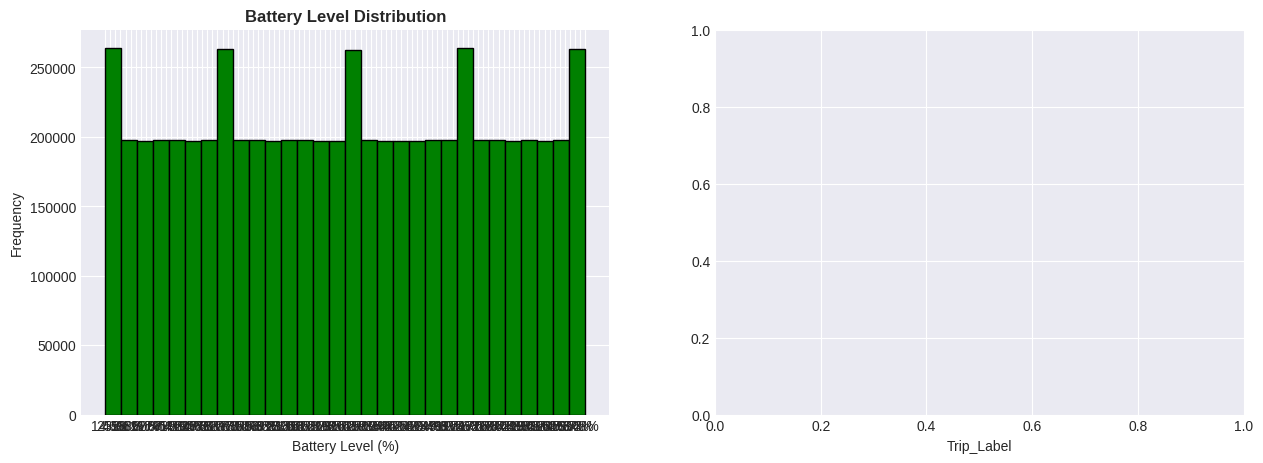

In [22]:
if 'Battery_Level' in train.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    train['Battery_Level'].hist(bins=30, ax=axes[0], edgecolor='black', color='green')
    axes[0].set_title('Battery Level Distribution', fontweight='bold')
    axes[0].set_xlabel('Battery Level (%)')
    axes[0].set_ylabel('Frequency')
    
    if target_col in train.columns:
        train.boxplot(column='Battery_Level', by=target_col, ax=axes[1])
        axes[1].set_title('Battery Level by Trip Label', fontweight='bold')
        axes[1].set_xlabel('Trip Label')
        axes[1].set_ylabel('Battery Level (%)')
        axes[1].tick_params(axis='x', rotation=45)
        plt.suptitle('')
    
    plt.tight_layout()
    plt.show()

## 8. Correlation Analysis

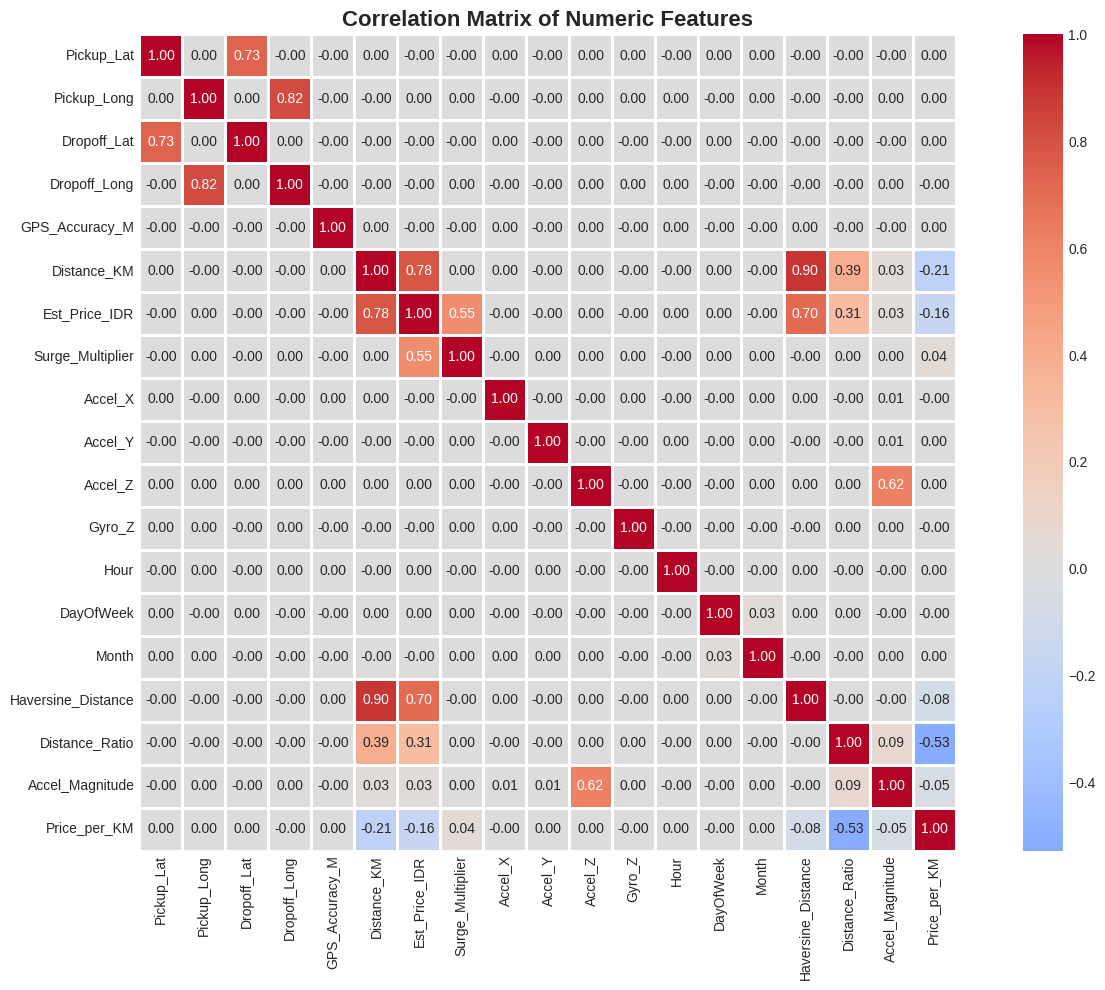


Highly Correlated Feature Pairs (|correlation| > 0.7):
    Feature 1          Feature 2  Correlation
   Pickup_Lat        Dropoff_Lat     0.734546
  Pickup_Long       Dropoff_Long     0.821990
  Distance_KM      Est_Price_IDR     0.784903
  Distance_KM Haversine_Distance     0.895761
Est_Price_IDR Haversine_Distance     0.702496


In [23]:
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()

if 'Trip_ID' in numeric_cols:
    numeric_cols.remove('Trip_ID')
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

if numeric_cols:
    correlation_matrix = train[numeric_cols].corr()
    
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1)
    plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    high_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                high_corr.append([
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    correlation_matrix.iloc[i, j]
                ])
    
    if high_corr:
        high_corr_df = pd.DataFrame(high_corr, columns=['Feature 1', 'Feature 2', 'Correlation'])
        print(high_corr_df.to_string(index=False))
    else:
        print("No highly correlated feature pairs found.")

## 9. Feature Importance (Initial Assessment)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

if target_col in train.columns:
    analysis_df = train.copy()
    
    label_encoders = {}
    categorical_cols = analysis_df.select_dtypes(include=['object']).columns.tolist()
    
    if 'Trip_ID' in categorical_cols:
        categorical_cols.remove('Trip_ID')
    if target_col in categorical_cols:
        categorical_cols.remove(target_col)
    
    for col in categorical_cols:
        le = LabelEncoder()
        analysis_df[col] = le.fit_transform(analysis_df[col].astype(str))
        label_encoders[col] = le
    
    feature_cols = [col for col in analysis_df.columns if col not in ['Trip_ID', target_col, 
                                                                       'Timestamp', 'Timestamp_parsed',
                                                                       'DayName']]
    
    X = analysis_df[feature_cols].fillna(-999)
    y = analysis_df[target_col]
    
    le_target = LabelEncoder()
    y_encoded = le_target.fit_transform(y)
    
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10)
    rf_model.fit(X, y_encoded)
    
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 20 Most Important Features (Random Forest):")
    print(feature_importance.head(20).to_string(index=False))
    
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(20)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 20 Feature Importances (Random Forest)', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## 10. Outlier Detection


Outlier Analysis (IQR Method):
           Feature  Outlier_Count  Outlier_Percentage
           Accel_X        1280866               16.01
            Gyro_Z        1166017               14.58
      Price_per_KM         419418                5.24
    Distance_Ratio         176445                2.21
     Est_Price_IDR         147852                1.85
   Accel_Magnitude         142336                1.78
       Distance_KM          63396                0.79
           Accel_Y          48105                0.60
           Accel_Z          43222                0.54
Haversine_Distance          41548                0.52
       Dropoff_Lat          10772                0.13
      Dropoff_Long           2609                0.03
        Pickup_Lat              0                0.00
       Pickup_Long              0                0.00
    GPS_Accuracy_M              0                0.00


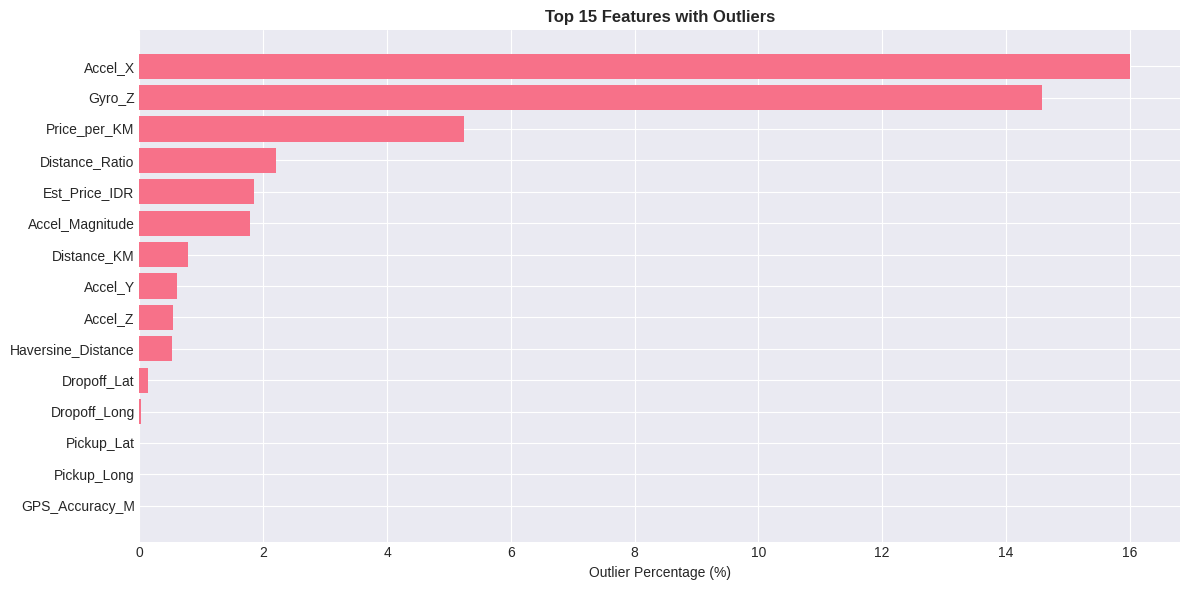

In [26]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), (len(outliers) / len(df)) * 100

numeric_features = train.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Trip_ID' in numeric_features:
    numeric_features.remove('Trip_ID')

outlier_summary = []
for col in numeric_features:
    count, pct = detect_outliers_iqr(train, col)
    outlier_summary.append({
        'Feature': col,
        'Outlier_Count': count,
        'Outlier_Percentage': round(pct, 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_Percentage', ascending=False)

print("\nOutlier Analysis (IQR Method):")
print(outlier_df.head(15).to_string(index=False))

plt.figure(figsize=(12, 6))
top_outliers = outlier_df.head(15)
plt.barh(range(len(top_outliers)), top_outliers['Outlier_Percentage'])
plt.yticks(range(len(top_outliers)), top_outliers['Feature'])
plt.xlabel('Outlier Percentage (%)')
plt.title('Top 15 Features with Outliers', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 11. Data Quality Summary

In [27]:
print("="*80)
print("DATA QUALITY SUMMARY")
print("="*80)

print(f"\n1. Dataset Size:")
print(f"   Training samples: {len(train):,}")
print(f"   Test samples: {len(test):,}")
print(f"   Total features: {train.shape[1]}")

if target_col in train.columns:
    print(f"\n2. Target Distribution:")
    for label, count in train[target_col].value_counts().items():
        pct = (count / len(train)) * 100
        print(f"   {label}: {count:,} ({pct:.2f}%)")

print(f"\n3. Missing Values:")
if len(missing_train) > 0:
    print(f"   Features with missing values: {len(missing_train)}")
    print(f"   Total missing cells: {missing_train['Missing_Count'].sum():,}")
else:
    print("   No missing values in training set")

print(f"\n4. Data Types:")
print(f"   Numeric features: {len(train.select_dtypes(include=['float64', 'int64']).columns)}")
print(f"   Categorical features: {len(train.select_dtypes(include=['object']).columns)}")

print(f"\n5. Cardinality:")
high_card = [col for col in train.select_dtypes(include=['object']).columns 
             if train[col].nunique() > 50]
if high_card:
    print(f"   High cardinality features (>50 unique): {', '.join(high_card)}")
else:
    print("   No high cardinality features detected")

print("\n" + "="*80)

DATA QUALITY SUMMARY

1. Dataset Size:
   Training samples: 8,000,000
   Test samples: 4,000,000
   Total features: 34

2. Target Distribution:
   Perfect_Trip: 4,397,607 (54.97%)
   Safety_Violation: 1,601,595 (20.02%)
   Navigation_Issue: 801,790 (10.02%)
   Service_Complaint: 798,695 (9.98%)
   Fraud_Indication: 400,313 (5.00%)

3. Missing Values:
   Features with missing values: 23
   Total missing cells: 28,184,662

4. Data Types:
   Numeric features: 19
   Categorical features: 14

5. Cardinality:
   High cardinality features (>50 unique): Trip_ID, Timestamp, Pickup_Zone, Dropoff_Zone, Device_FP, Promo_Code, Battery_Level

